In [49]:
import pandas as pd
import seaborn as sns

df = pd.read_csv("data.csv")

In [16]:
# DF HAS NA ROWS

# DISCRETE - sex , cp , fbs , restecg, exang , slope, ca , thal
# CONTINOUS - age, trestbps, chol, thalach, oldpeak

# NEED TO NORMALIZE  - age, trestbps, chol, thalach, oldpeak

# SLIGHT IMBALANCE - 2465 difference , class 1 is higher

# CHECK EACH AND EVERY COLUMN

25


In [48]:
# VIEWING THE STATISTICS for each column in tabular form

df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,26083.0,55.661389,15.189768,11.0,44.0,56.0,67.0,98.0
sex,26058.0,0.500000,0.500010,0.0,0.0,0.5,1.0,1.0
cp,26083.0,0.958594,1.023931,0.0,0.0,1.0,2.0,3.0
trestbps,26083.0,131.592992,17.588809,94.0,120.0,130.0,140.0,200.0
chol,26083.0,246.246061,51.643522,126.0,211.0,240.0,275.0,564.0
fbs,26083.0,0.149753,0.356836,0.0,0.0,0.0,0.0,1.0
restecg,26083.0,0.526512,0.525641,0.0,0.0,1.0,1.0,2.0
thalach,26083.0,149.655024,22.858109,71.0,133.0,153.0,166.0,202.0
exang,26083.0,0.326573,0.468969,0.0,0.0,0.0,1.0,1.0
oldpeak,26083.0,1.039512,1.165138,0.0,0.0,0.8,1.6,6.2


<Axes: xlabel='age', ylabel='Count'>

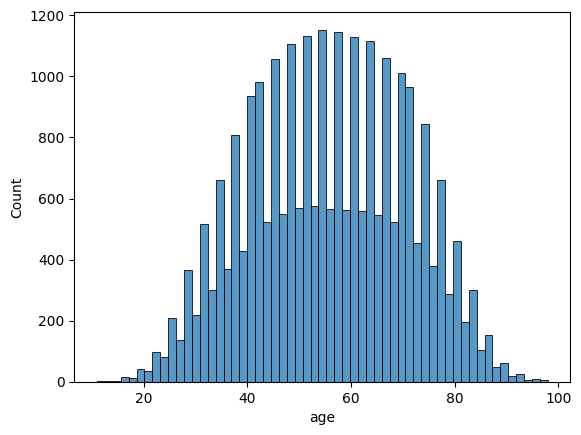

In [50]:
# Histogram for AGE column
sns.histplot(df['age'])

<Axes: xlabel='trestbps', ylabel='Count'>

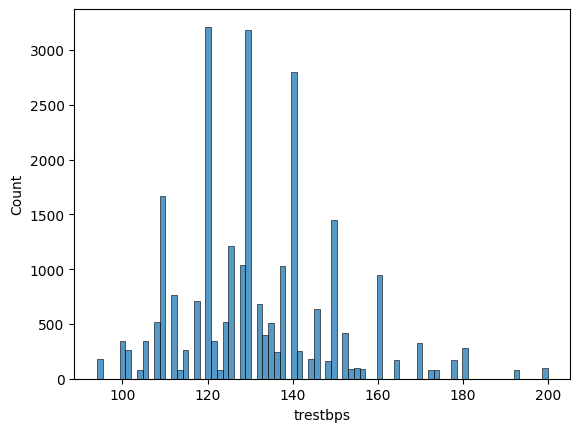

In [51]:
# Histogram for trestbps column
sns.histplot(df['trestbps'])

<Axes: xlabel='chol', ylabel='Count'>

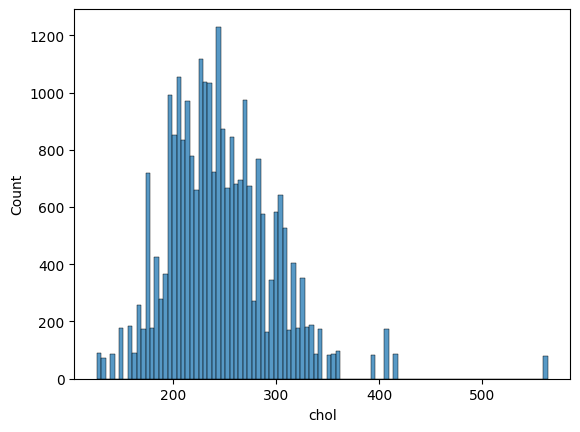

In [52]:
# Histogram for chol column
sns.histplot(df['chol'])

<Axes: xlabel='thalach', ylabel='Count'>

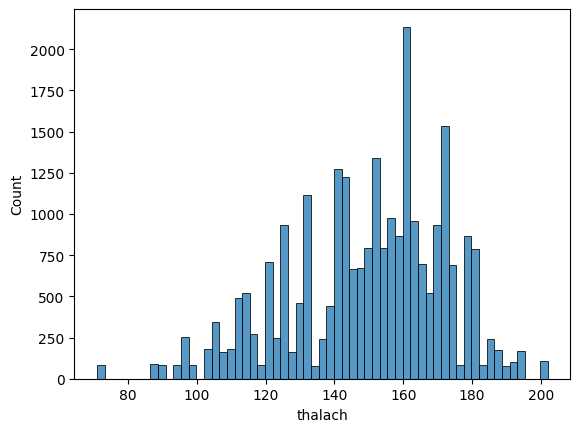

In [53]:
# Histogram for thalach column
sns.histplot(df['thalach'])

<Axes: xlabel='oldpeak', ylabel='Count'>

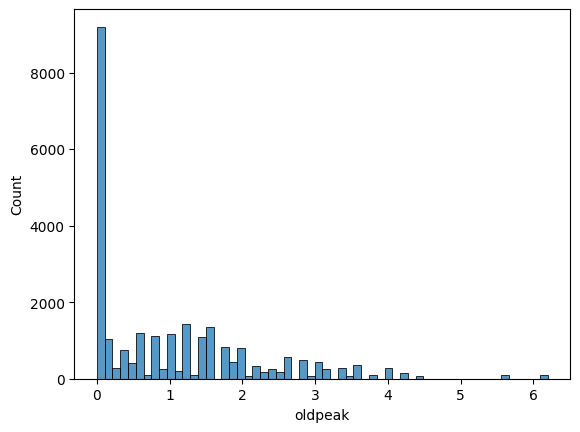

In [54]:
# Histogram for oldpeak column
sns.histplot(df['oldpeak'])

<Axes: xlabel='sex', ylabel='count'>

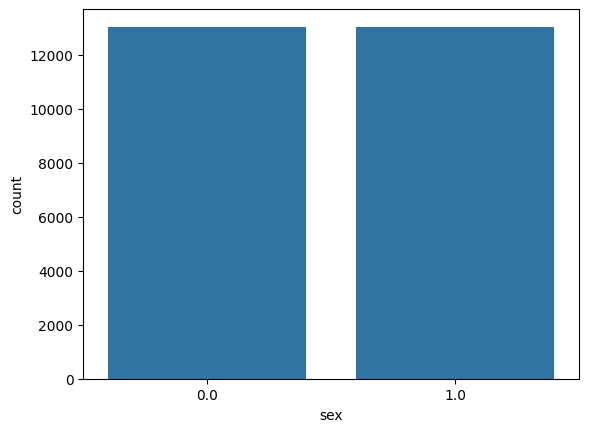

In [55]:
# Countplots for Gender
sns.countplot(x='sex', data=df)

<Axes: xlabel='cp', ylabel='count'>

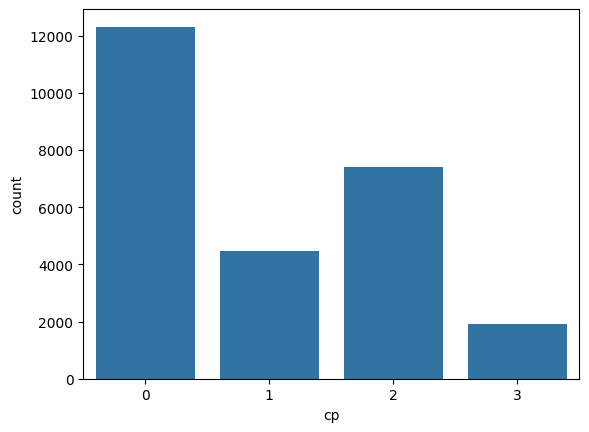

In [56]:
# Countplots for chest pain
sns.countplot(x='cp', data=df)

<Axes: xlabel='fbs', ylabel='count'>

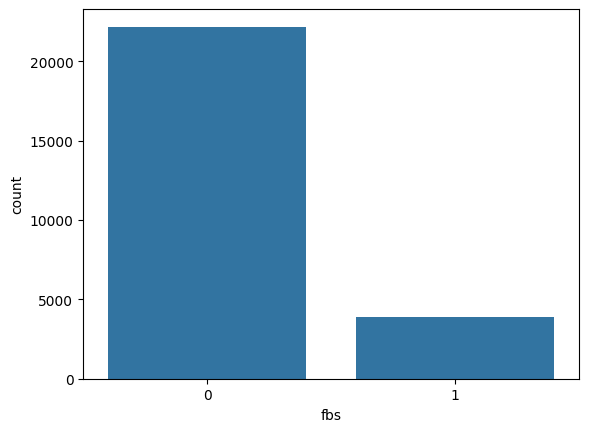

In [58]:
# Countplots for fasting balanced sugar
sns.countplot(x='fbs', data=df)

<Axes: xlabel='restecg', ylabel='count'>

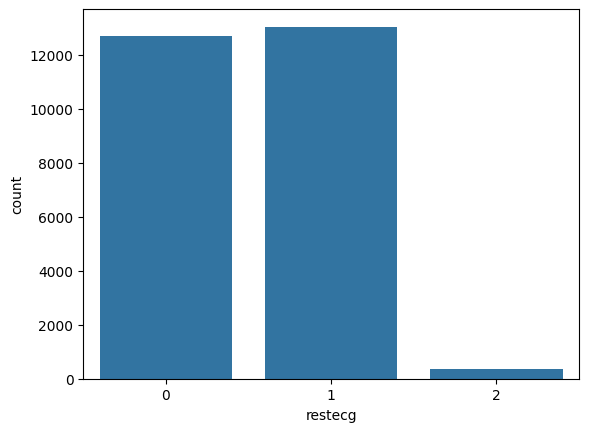

In [60]:
# Countplots for resting electrocardiographic result
sns.countplot(x='restecg', data=df)

<Axes: xlabel='exang', ylabel='count'>

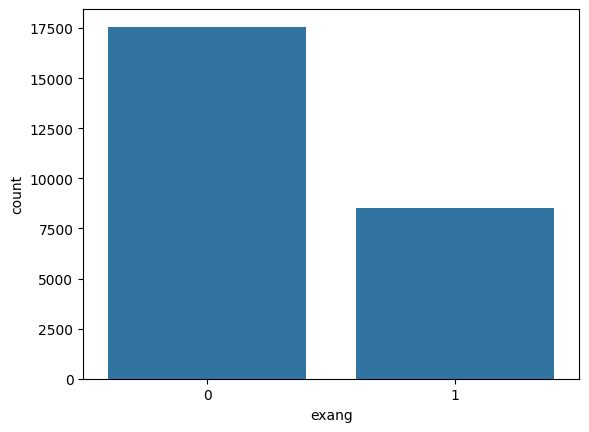

In [62]:
# Countplots for exercise induced angina
sns.countplot(x='exang', data=df)

<Axes: xlabel='slope', ylabel='count'>

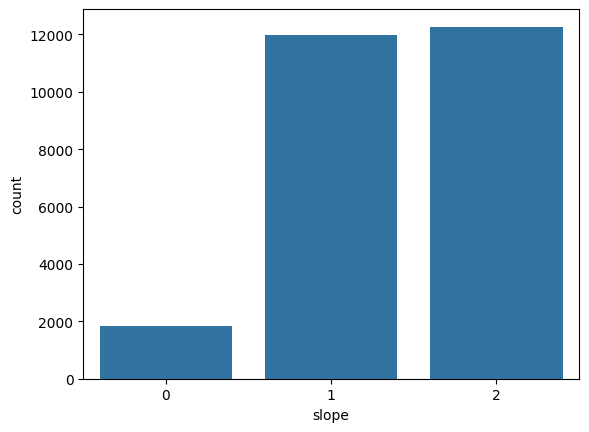

In [63]:
# Countplots for slope
sns.countplot(x='slope', data=df)

<Axes: xlabel='ca', ylabel='count'>

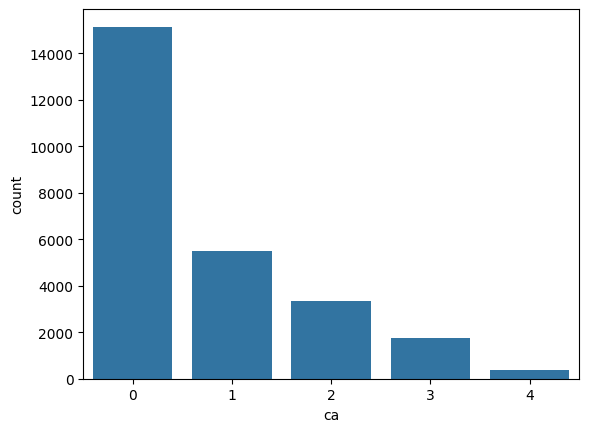

In [64]:
# Countplots for cardiac arrest
sns.countplot(x='ca', data=df)

<Axes: xlabel='thal', ylabel='count'>

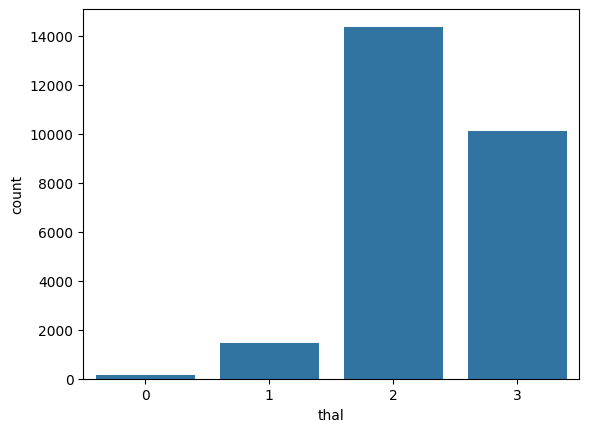

In [65]:
# Countplots for Thalassemia
sns.countplot(x='thal', data=df)

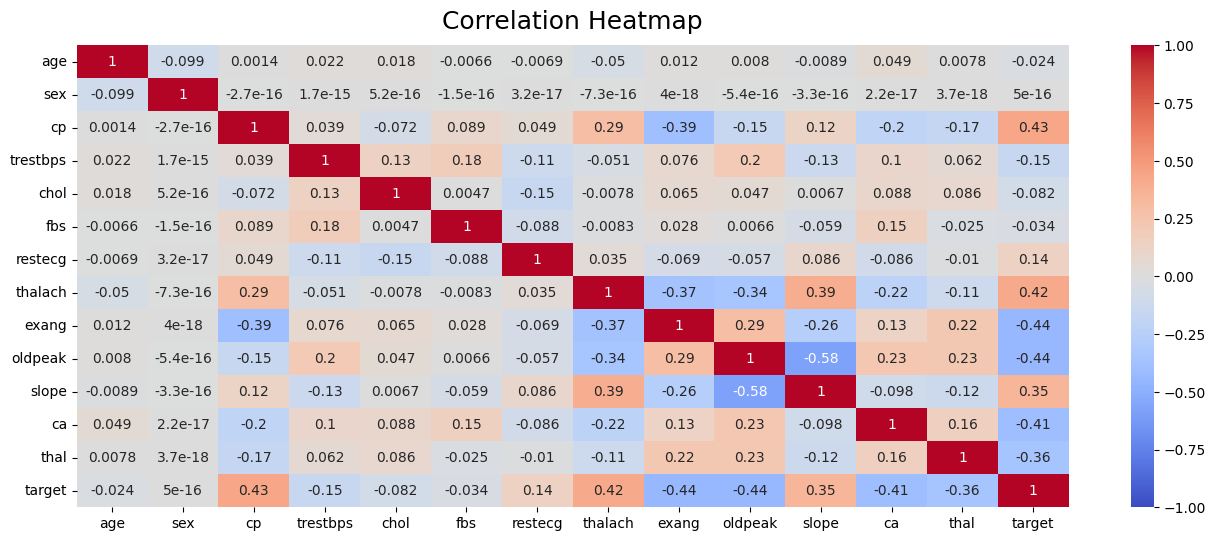

In [71]:
# HEATMAP

plt.figure(figsize=(16, 6))

heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);


In [92]:
# VIEW ALL variables correlated with column 'target' in desc order

df.corr()['target'].sort_values(ascending=False)

,target
target,1.000000e+00
cp,4.338210e-01
thalach,4.190405e-01
slope,3.498362e-01
restecg,1.360681e-01
sex,4.951044e-16
age,-2.354715e-02
fbs,-3.358049e-02
chol,-8.211748e-02
trestbps,-1.485082e-01


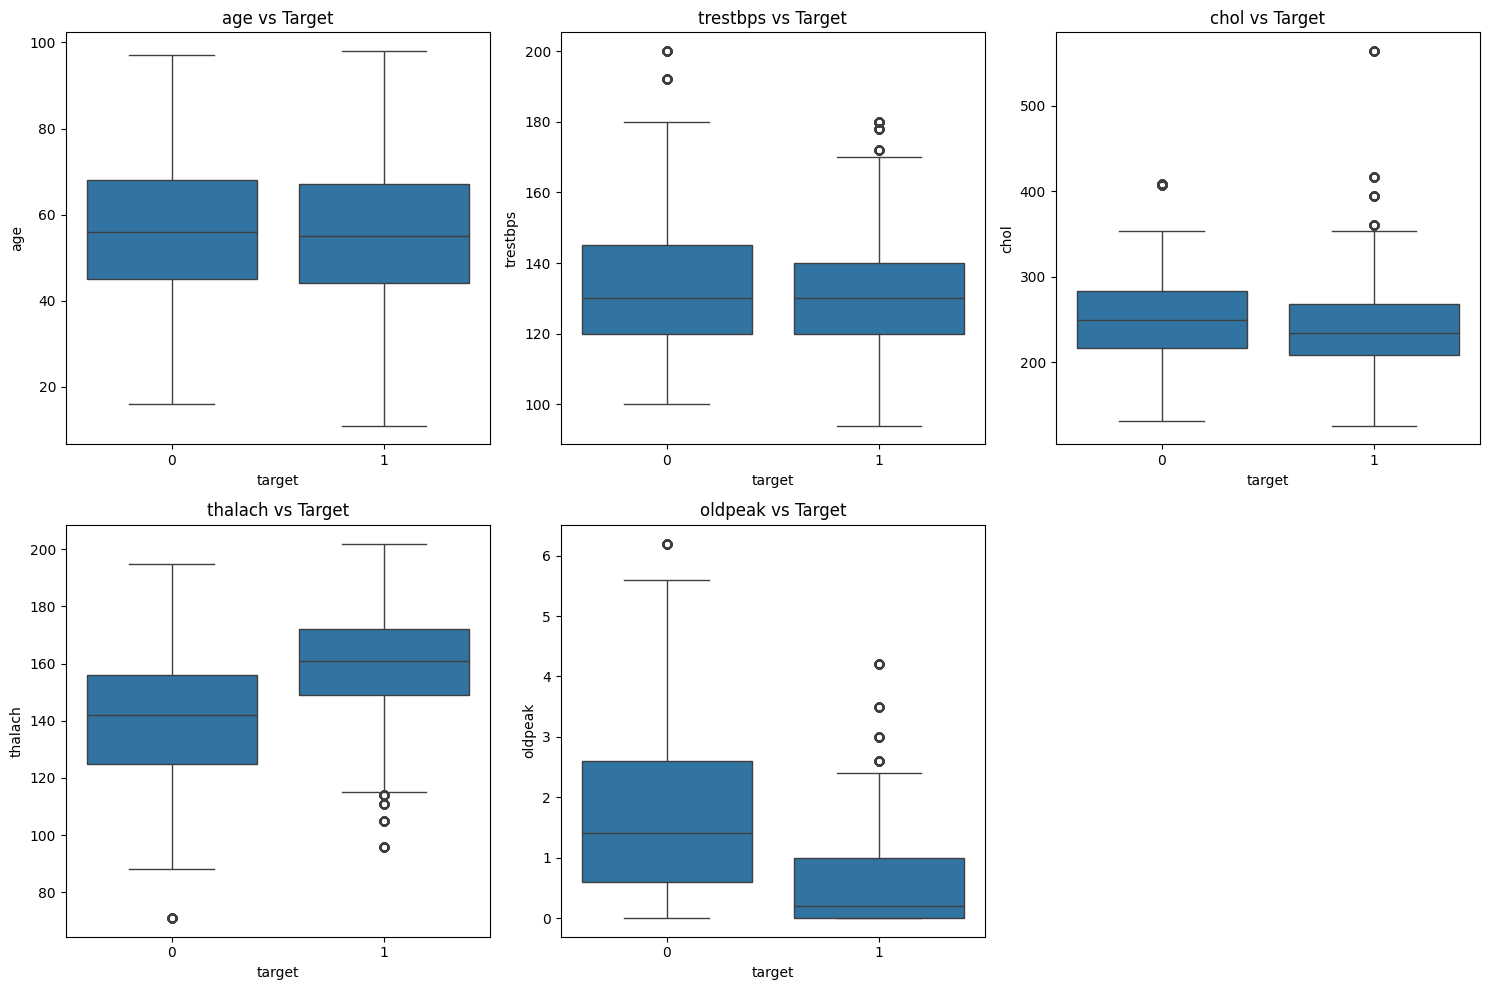

In [73]:
# ANALYSIS OF CONTINOUS VARIABLES
# BOX PLOTS

continous = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Continuous features vs target
plt.figure(figsize=(15, 10))
for i, col in enumerate(continous):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='target', y=col, data=df)
    plt.title(f'{col} vs Target')
plt.tight_layout()
plt.show()

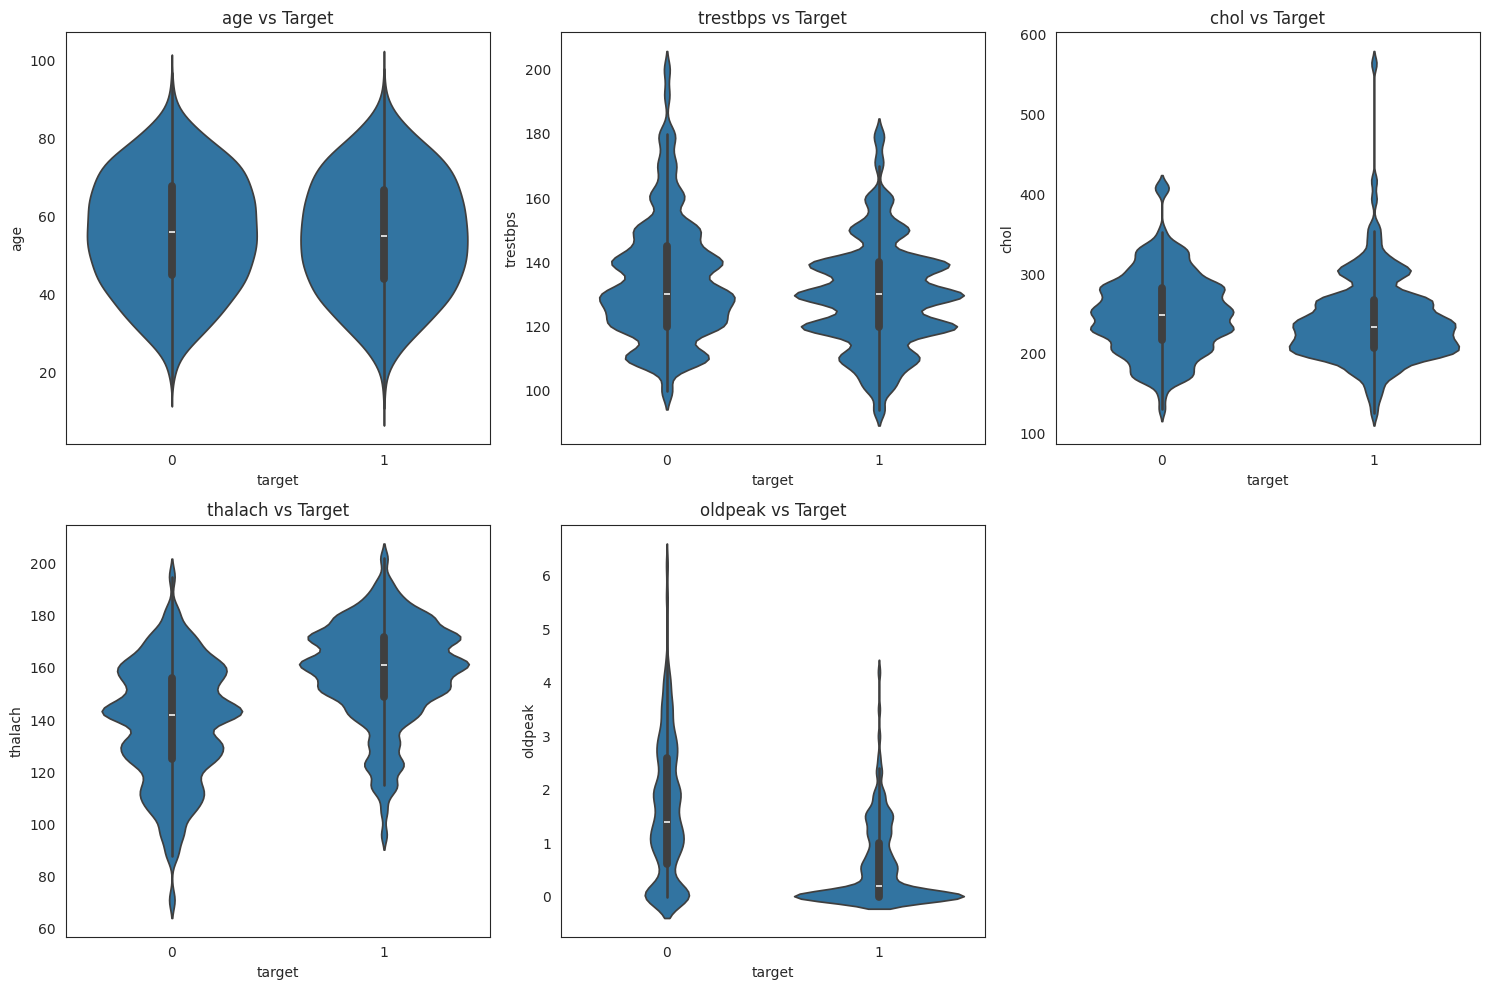

In [132]:
# ANALYSIS OF CONTINOUS VARIABLES
# VIOLIN PLOTS
continous = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Continuous features vs target
plt.figure(figsize=(15, 10))
for i, col in enumerate(continous):
    plt.subplot(2, 3, i+1)
    sns.violinplot(x='target', y=col, data=df)
    plt.title(f'{col} vs Target')
plt.tight_layout()
plt.show()

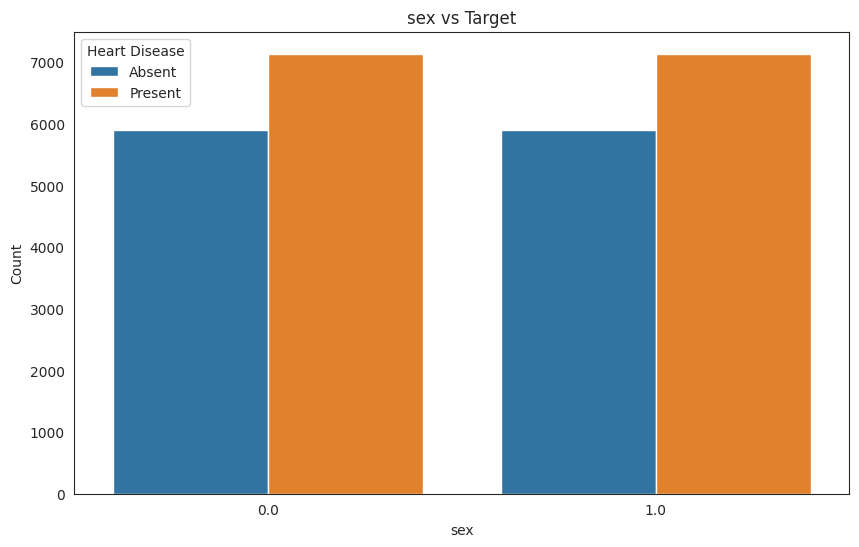

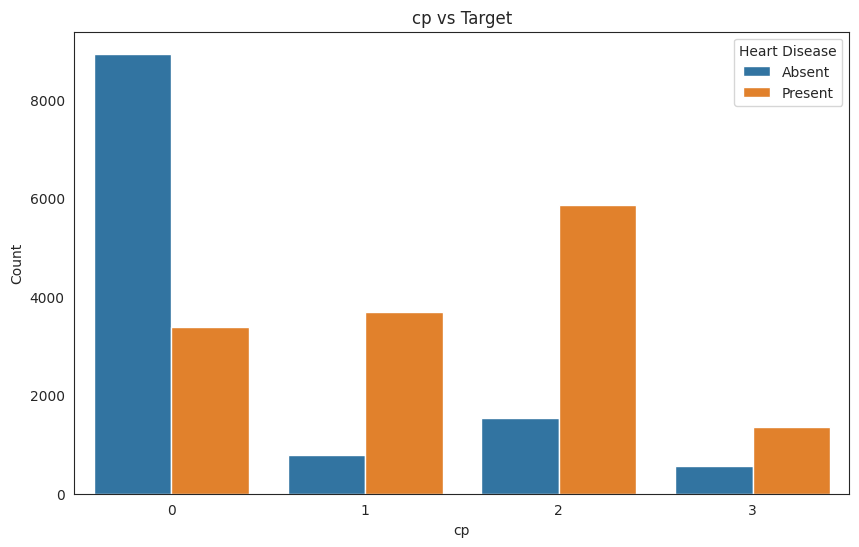

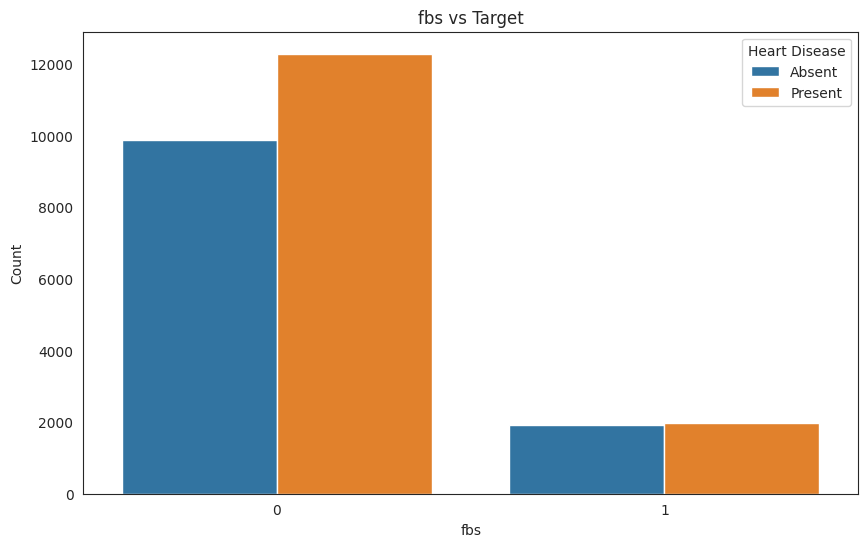

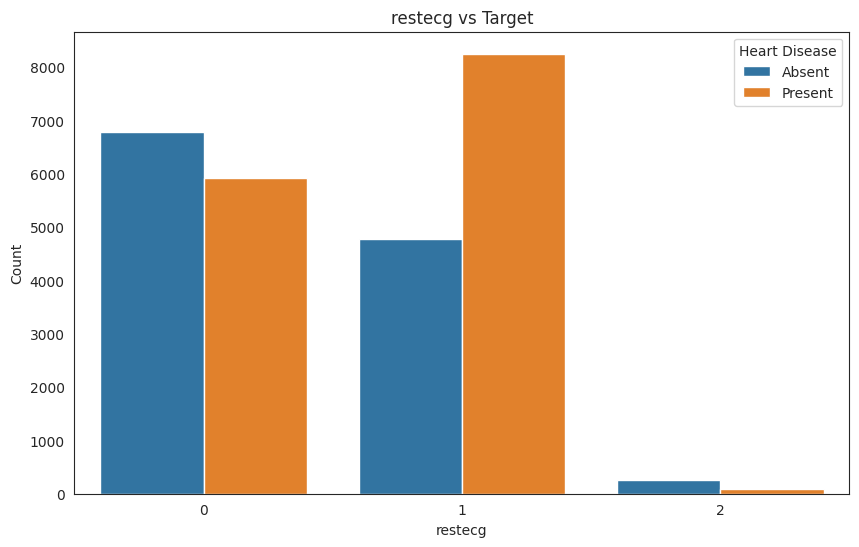

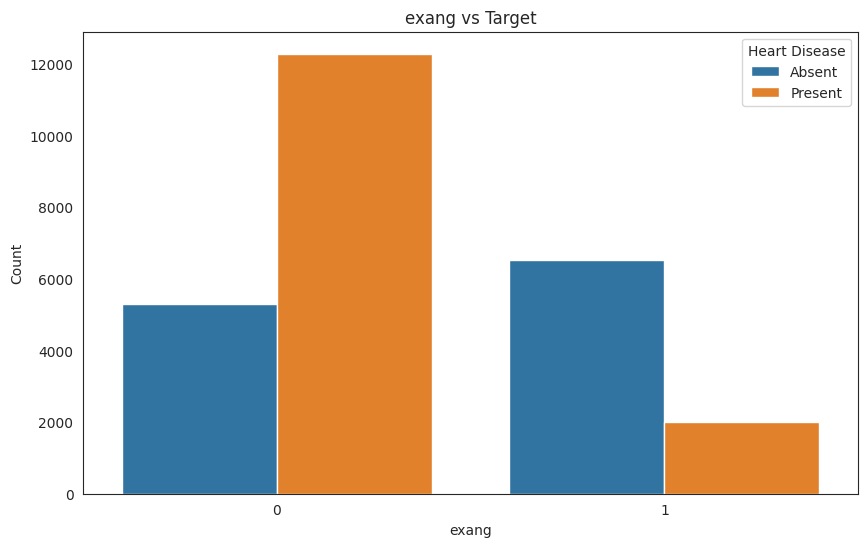

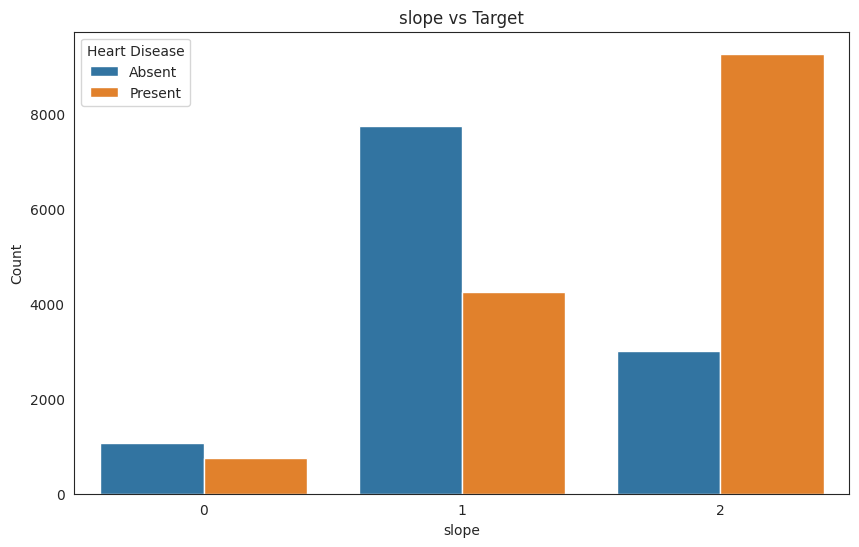

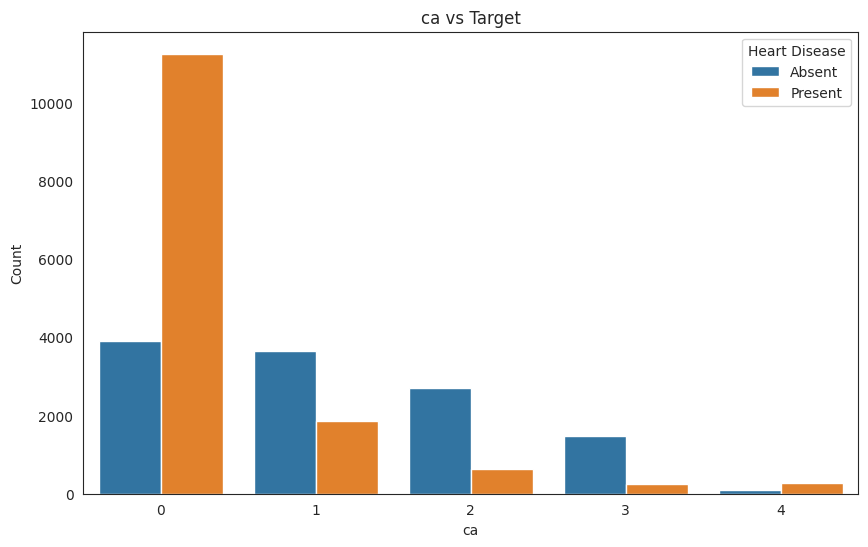

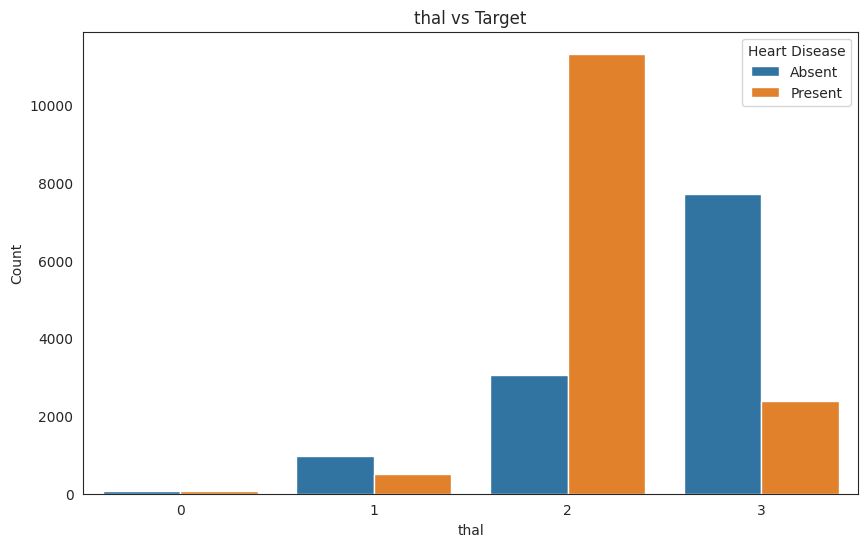

In [126]:
# ANALYSIS OF DISCRETE VARIABLES
# Relationship of each discrete variable with target variable

for col in ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, hue='target', data=df)
    plt.title(f'{col} vs Target')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Heart Disease', labels=['Absent', 'Present'])
    plt.xticks()
    plt.show()

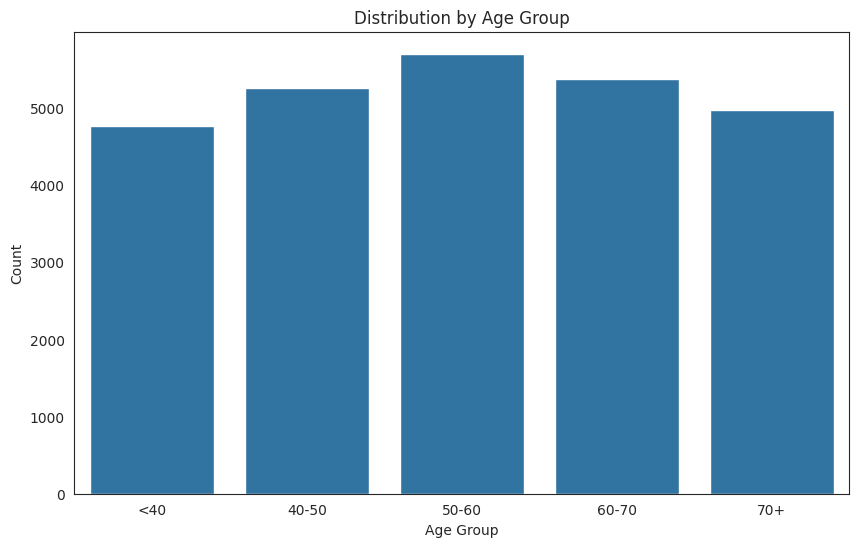

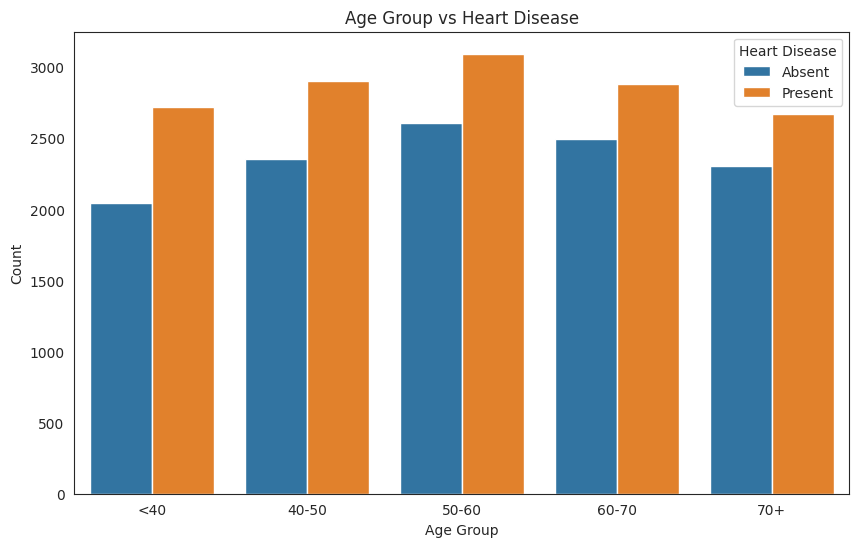

In [129]:
# Create age groups
df['age_group'] = pd.cut(df['age'], bins=[0, 40, 50, 60, 70, 100],
                        labels=['<40', '40-50', '50-60', '60-70', '70+'])

# Age group distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='age_group', data=df)
plt.title('Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()


plt.figure(figsize=(10, 6))
sns.countplot(x='age_group', hue='target', data=df)
plt.title('Age Group vs Heart Disease')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['Absent', 'Present'])
plt.show()

In [81]:
# NORMALIZE VALUES
from sklearn.preprocessing import StandardScaler, RobustScaler

df_scaled = df.copy()

# Apply StandardScaler to normally distributed features - age
standard_features = ['age']
standard_scaler = StandardScaler()
df_scaled[standard_features] = standard_scaler.fit_transform(df[standard_features])

# Apply RobustScaler to trestbps, chol, and oldpeak
robust_features = ['trestbps', 'chol', 'thalach', 'oldpeak']
robust_scaler = RobustScaler()
df_scaled[robust_features] = robust_scaler.fit_transform(df[robust_features])



In [82]:
df_scaled.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.088128,1.0,3,0.75,-0.109375,1,0,-0.090909,0,0.9375,0,0,1,1
1,0.548973,0.0,2,0.00,0.156250,0,1,1.030303,0,1.6875,0,0,2,1
2,-0.241048,1.0,1,0.00,-0.562500,0,0,0.575758,0,0.3750,2,0,2,1
3,0.022292,0.0,1,-0.50,-0.062500,0,1,0.757576,0,0.0000,2,0,2,1
4,0.680643,0.0,0,-0.50,1.781250,0,1,0.303030,1,-0.1250,2,0,2,1


In [83]:
# CHECKING FOR NULL VALUES - the column sex has null values

df_scaled.isnull().any()

,0
age,False
sex,True
cp,False
trestbps,False
chol,False
fbs,False
restecg,False
thalach,False
exang,False
oldpeak,False


In [88]:
# Remove rows with NaNs

df_scaled.dropna(inplace=True)

In [91]:
# DATA SPLITTING
from sklearn.model_selection import train_test_split

x = df_scaled.drop('target', axis =1)
y = df_scaled['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

######-Model => RandomForestClassifier 
Test Accuracy :  100.00000%  
              Classification_report 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2319
           1       1.00      1.00      1.00      2893

    accuracy                           1.00      5212
   macro avg       1.00      1.00      1.00      5212
weighted avg       1.00      1.00      1.00      5212

             Confusion_matrix 


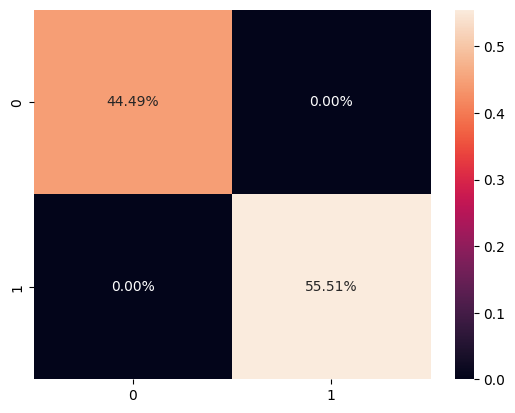

###################- End -###################
######-Model => DecisionTreeClassifier 
Test Accuracy :  100.00000%  
              Classification_report 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2319
           1       1.00      1.00      1.00      2893

    accuracy                           1.00      5212
   macro avg       1.00      1.00      1.00      5212
weighted avg       1.00      1.00      1.00      5212

             Confusion_matrix 


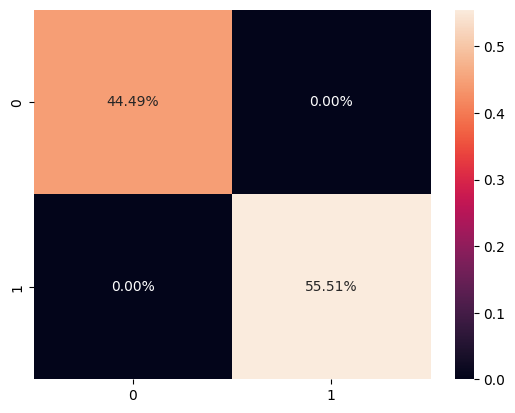

###################- End -###################
######-Model => KNeighborsClassifier 
Test Accuracy :  100.00000%  
              Classification_report 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2319
           1       1.00      1.00      1.00      2893

    accuracy                           1.00      5212
   macro avg       1.00      1.00      1.00      5212
weighted avg       1.00      1.00      1.00      5212

             Confusion_matrix 


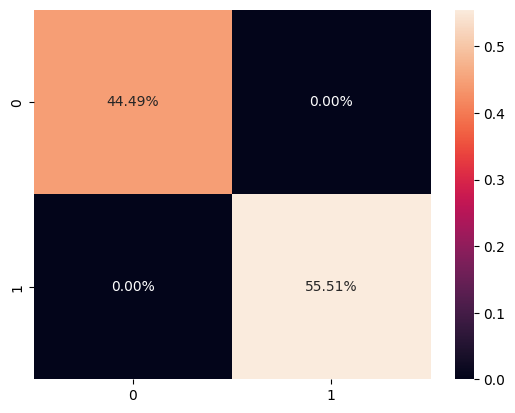

###################- End -###################
######-Model => AdaBoostClassifier 
Test Accuracy :  86.97237%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.88      0.82      0.85      2319
           1       0.86      0.91      0.89      2893

    accuracy                           0.87      5212
   macro avg       0.87      0.86      0.87      5212
weighted avg       0.87      0.87      0.87      5212

             Confusion_matrix 


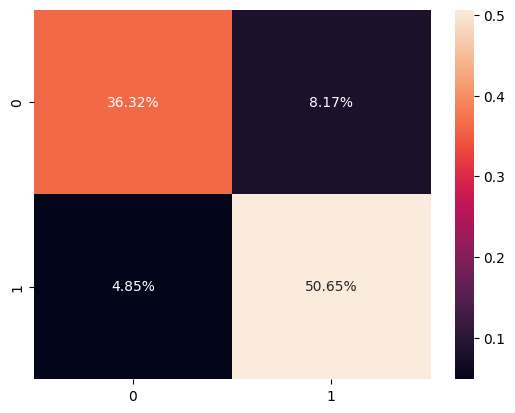

###################- End -###################
######-Model => SGDClassifier 
Test Accuracy :  82.13738%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.78      0.84      0.81      2319
           1       0.86      0.80      0.83      2893

    accuracy                           0.82      5212
   macro avg       0.82      0.82      0.82      5212
weighted avg       0.82      0.82      0.82      5212

             Confusion_matrix 


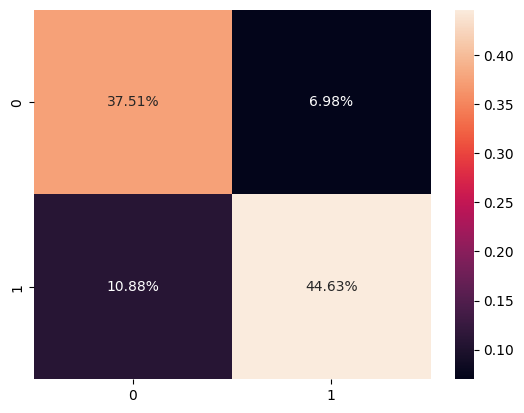

###################- End -###################
######-Model => GaussianNB 
Test Accuracy :  82.94321%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.82      0.78      0.80      2319
           1       0.83      0.87      0.85      2893

    accuracy                           0.83      5212
   macro avg       0.83      0.82      0.83      5212
weighted avg       0.83      0.83      0.83      5212

             Confusion_matrix 


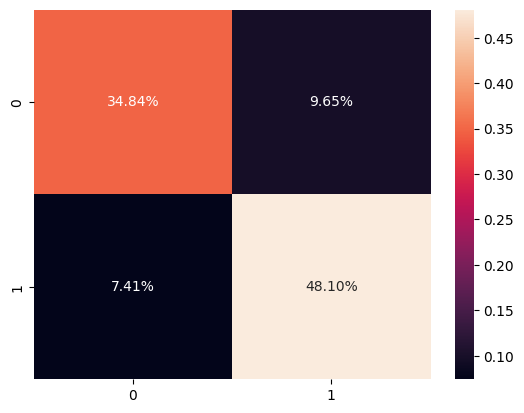

###################- End -###################
######-Model => SVC 
Test Accuracy :  96.43131%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      2319
           1       0.96      0.98      0.97      2893

    accuracy                           0.96      5212
   macro avg       0.97      0.96      0.96      5212
weighted avg       0.96      0.96      0.96      5212

             Confusion_matrix 


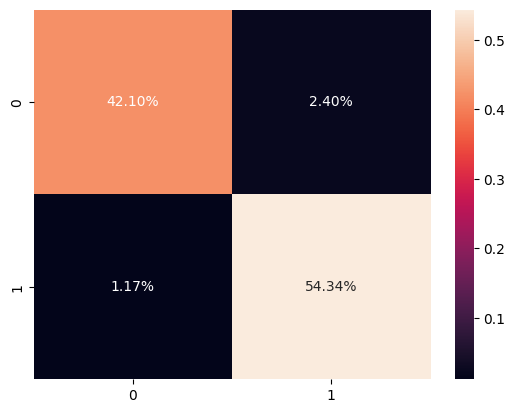

###################- End -###################


In [94]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

models = [RandomForestClassifier, DecisionTreeClassifier, KNeighborsClassifier, AdaBoostClassifier, SGDClassifier, GaussianNB, SVC]
accuracy_test=[]
model = []
for m in models:
    model_name = type(m()).__name__
    print('######-Model =>\033[07m {} \033[0m'.format(type(m()).__name__))
    model_ = m()
    model_.fit(x_train, y_train)
    pred = model_.predict(x_test)
    acc = accuracy_score(pred, y_test)
    accuracy_test.append(acc)
    model.append(model_name)
    print('Test Accuracy :\033[32m \033[01m {:.5f}% \033[30m \033[0m'.format(acc*100))
    print('\033[01m              Classification_report \033[0m')
    print(classification_report(y_test, pred))
    print('\033[01m             Confusion_matrix \033[0m')
    cf_matrix = confusion_matrix(y_test, pred)
    plot_ = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt= '0.2%')
    plt.show()
    print('\033[31m###################- End -###################\033[0m')

In [119]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# NEURAL NETWORK

input_size = x_train.shape[1]
output_size = 1
hidden_layer_size = 50

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_layer_size, input_shape=(input_size,), activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(output_size, activation='sigmoid')
])

# Print model summary
model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                     │ (None, 50)                  │             700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,401 (32.82 KB)

 Trainable params: 8,401 (32.82 KB)

 Non-trainable params: 0 (0.00 B)

In [120]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [122]:
# Set training parameters
batch_size = 32
max_epochs = 20


# Train the model
result = model.fit(
    x=x_train,
    y=y_train,
    batch_size=batch_size,
    epochs=max_epochs,
    verbose=1,
    validation_split=0.2
)

Epoch 1/20
522/522 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8223 - loss: 0.4104 - val_accuracy: 0.9530 - val_loss: 0.1453
Epoch 2/20
522/522 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9642 - loss: 0.1104 - val_accuracy: 0.9950 - val_loss: 0.0255
Epoch 3/20
522/522 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9988 - loss: 0.0106 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 4/20
522/522 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 1.0000 - loss: 9.0209e-04 - val_accuracy: 1.0000 - val_loss: 3.9154e-04
Epoch 5/20
522/522 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 1.0000 - loss: 2.8170e-04 - val_accuracy: 1.0000 - val_loss: 1.9192e-04
Epoch 6/20
522/522 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 1.0000 - loss: 1.4425e-04 - val_accuracy: 1.0000 - val_loss: 9.8590e-05
Epoch 7/20
522/522 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 1.0000 - loss: 7.8025e-05 - val_accuracy: 1.0000 - val_loss: 5.8554e-05
Epoch 8/20
522/522 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 1.0000 -

<ipython-input-123-efb59ac8bcf7>:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax2.plot(epochs, loss, "bo", label="Training loss", color='red')
<ipython-input-123-efb59ac8bcf7>:23: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax2.plot(epochs, val_loss, "b", label="Validation loss", color='red')


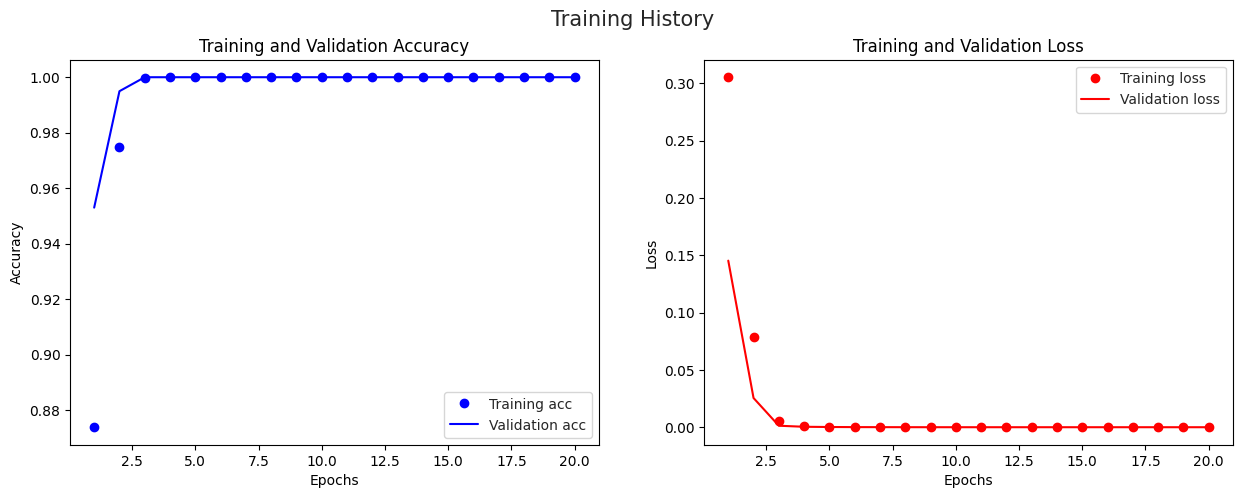

In [123]:
# Visualize the result
acc = result.history['accuracy']
val_acc = result.history['val_accuracy']
loss = result.history['loss']
val_loss = result.history['val_loss']
epochs = range(1, len(acc) + 1)

# Plot training history
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.set_style("white")
plt.suptitle('Training History', size=15)

# Accuracy plot
ax1.plot(epochs, acc, "bo", label="Training acc")
ax1.plot(epochs, val_acc, "b", label="Validation acc")
ax1.set_title("Training and Validation Accuracy")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Accuracy")
ax1.legend()

# Loss plot
ax2.plot(epochs, loss, "bo", label="Training loss", color='red')
ax2.plot(epochs, val_loss, "b", label="Validation loss", color='red')
ax2.set_title("Training and Validation Loss")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Loss")
ax2.legend()

plt.show()

163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 1.0000 - loss: 2.1010e-07
######-Model =>  Neural Network 
Test Accuracy :   100.00000%  
Test Loss :   0.000000 
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
 Classification_report 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2319
           1       1.00      1.00      1.00      2893

    accuracy                           1.00      5212
   macro avg       1.00      1.00      1.00      5212
weighted avg       1.00      1.00      1.00      5212

 Confusion_matrix 


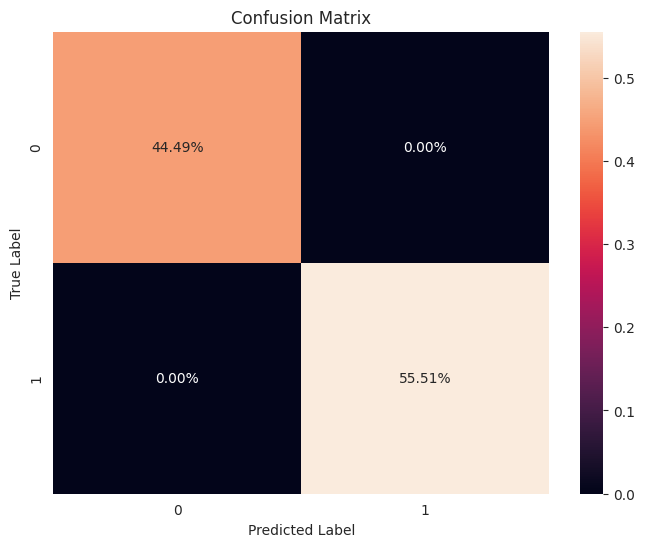

###################- End -###################


In [124]:
# Evaluate on test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print('######-Model => \033[07m Neural Network \033[0m')
print('Test Accuracy : \033[32m \033[01m {:.5f}% \033[30m \033[0m'.format(test_accuracy * 100))
print('Test Loss : \033[31m \033[01m {:.6f} \033[0m'.format(test_loss))

# Make predictions
predictions = model.predict(x_test)
predictions_binary = (predictions > 0.5).astype(int)  # Convert probabilities to binary class labels

# Print classification report
print('\033[01m Classification_report \033[0m')
print(classification_report(y_test, predictions_binary))

# Print confusion matrix
print('\033[01m Confusion_matrix \033[0m')
cf_matrix = confusion_matrix(y_test, predictions_binary)
plt.figure(figsize=(8, 6))
plot_ = sns.heatmap(cf_matrix / np.sum(cf_matrix), annot=True, fmt='0.2%')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print('\033[31m###################- End -###################\033[0m')